# Pymaceuticals Inc.
---


In [1]:
# Dependencies and Setup

# Study data files

# Read the mouse data and the study results

# Combine the data into a single dataset

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# Study data files
Mouse_metadata = "data/Mouse_metadata.csv"
Study_results = "data/Study_results.csv"

# Read the mouse data and the study results
# using Pandas .read_csv()
Mouse_metadata = pd.read_csv(Mouse_metadata)
Study_results = pd.read_csv(Study_results)

In [2]:
Mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
Study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
# using pandas .merge. Performing an outer join in the
# field 'Mouse ID' will add the data from 'Study_results'
# to the 'All_Mouse_data_df' dataset.
All_Mouse_data_df = pd.merge(Study_results, Mouse_metadata, how='left')
All_Mouse_data_df

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.

249

In [ ]:
# Use .value_counts to obtain the unique values in the 
# column 'Mouse ID' in the dataset 'All_Mouse_data_df'.  
# This series is assigned to the variable 'lab_mice'.  
lab_mice = All_Mouse_data_df['Mouse ID'].value_counts()

# Using len(), we can obtain the length of the series (or number 
# of lab mice) by applyinng len() to the variable 'lab_mice'
lab_mice_count = len(lab_mice)

lab_mice_count

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

array(['g989'], dtype=object)

In [6]:
# Using pandas .duplicated() and applying the subset to
# equal 'Mouse ID' and 'Timepoint' will give return a boolean.
# Each row where the boolean is True, there is a duplicate 
# based on the same 'Mouse ID' and 'Timepoint' appearing more than once
Duplicated_mice_subset = All_Mouse_data_df.duplicated(subset=['Mouse ID','Timepoint'])
Duplicated_mice_subset

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [7]:
# Using .loc() we can pass the boolean 'Duplicated_m' to
# obtain the list of the rows from the dataset that equal True

All_Mouse_data_df.loc[Duplicated_mice_subset]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# using list comprehension I can concentrate on the 'Mouse ID'
# column by adding a comma and the column 'Mouse ID'
All_Mouse_data_df.loc[Duplicated_mice_subset, 'Mouse ID']

137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [9]:
# to obtain the unique values in the column 'Mouse ID'
# use .unique()
All_Mouse_data_df.loc[Duplicated_mice_subset, 'Mouse ID'].unique()

array(['g989'], dtype=object)

In [10]:
# Set the duplicate lab mice to a variable
duplicate_lab_mice = All_Mouse_data_df.loc[Duplicated_mice_subset, 'Mouse ID'].unique()

In [11]:
duplicate_lab_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [12]:
# Using pandas .isin() == True and applying the boolean result
# 'duplicate_lab_mice', the output will return True where
# Each row is True where the column 'Mouse ID' equals 'duplicate_lab_mice'
# in 'duplicate_lab_mice'.  Applying list comprehension outputs
# the corresponding rows from the nested .isin().

All_Mouse_data_df[All_Mouse_data_df['Mouse ID'].isin(duplicate_lab_mice)==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
# Using pandas .isin() == False and applying the boolean result
# 'duplicate_lab_mice', the output will return True where
# Each row is False in 'duplicate_lab_mice' 

All_Mouse_data_df['Mouse ID'].isin(duplicate_lab_mice)==False

0       True
1       True
2       True
3       True
4       True
        ... 
1888    True
1889    True
1890    True
1891    True
1892    True
Name: Mouse ID, Length: 1893, dtype: bool

In [14]:
# Set clean lab mice boolean data to a variable
All_Mouse_data_df_c = All_Mouse_data_df['Mouse ID'].isin(duplicate_lab_mice)==False
All_Mouse_data_df_c

0       True
1       True
2       True
3       True
4       True
        ... 
1888    True
1889    True
1890    True
1891    True
1892    True
Name: Mouse ID, Length: 1893, dtype: bool

In [15]:
# Using .loc() we can pass the boolean 'All_Mouse_data_c' to
# obtain the list of the rows from the dataset that equal True

Clean_All_Mouse_data_df = All_Mouse_data_df.loc[All_Mouse_data_df_c]
Clean_All_Mouse_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.

248

In [16]:
# use pandas .value_counts() to onbtain how many times
# each unique value appears in the list
# the length of this list will let us know how many unique
# mice participated

unique_mouse_count = Clean_All_Mouse_data_df['Mouse ID'].value_counts()
unique_mouse_count

b742    10
a492    10
j989    10
a963    10
j755    10
        ..
h428     1
b447     1
l872     1
x226     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

In [17]:
# using pandas len() the number of unique values
# will
len(unique_mouse_count)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
Drug_regimen_mean = Clean_All_Mouse_data_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
Drug_regimen_mean = pd.DataFrame(Drug_regimen_mean)
Drug_regimen_mean

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [19]:
Drug_regimen_median = Clean_All_Mouse_data_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
Drug_regimen_median = pd.DataFrame(Drug_regimen_median)
Drug_regimen_median

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [20]:
Drug_regimen_variance = Clean_All_Mouse_data_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
Drug_regimen_variance = pd.DataFrame(Drug_regimen_variance)
Drug_regimen_variance

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [21]:
Drug_regimen_std = Clean_All_Mouse_data_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
Drug_regimen_std = pd.DataFrame(Drug_regimen_std)
Drug_regimen_std

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [22]:
Drug_regimen_sem = Clean_All_Mouse_data_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
Drug_regimen_sem = pd.DataFrame(Drug_regimen_sem)
Drug_regimen_sem

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [23]:
Drug_info_df_1 = pd.merge(Drug_regimen_mean, Drug_regimen_median, on="Drug Regimen")
Drug_info_df_1

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [24]:
Drug_info_df_2 = pd.merge(Drug_regimen_variance, Drug_regimen_std, on="Drug Regimen")
Drug_info_df_2

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y
Drug Regimen,,
Capomulin,24.947764,4.994774
Ceftamin,39.290177,6.268188
Infubinol,43.128684,6.567243
Ketapril,68.553577,8.279709
Naftisol,66.173479,8.134708
Placebo,61.168083,7.821003
Propriva,43.852013,6.622085
Ramicane,23.486704,4.846308
Stelasyn,59.450562,7.710419


In [25]:
Drug_info_df_3 = pd.merge(Drug_info_df_2, Drug_regimen_sem, on="Drug Regimen")
Drug_info_df_3

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,Tumor Volume (mm3)
Drug Regimen,,,
Capomulin,24.947764,4.994774,0.329346
Ceftamin,39.290177,6.268188,0.469821
Infubinol,43.128684,6.567243,0.492236
Ketapril,68.553577,8.279709,0.603860
Naftisol,66.173479,8.134708,0.596466
Placebo,61.168083,7.821003,0.581331
Propriva,43.852013,6.622085,0.544332
Ramicane,23.486704,4.846308,0.320955
Stelasyn,59.450562,7.710419,0.573111


In [26]:
Drug_info_df_all = pd.merge(Drug_info_df_1, Drug_info_df_3, on="Drug Regimen")
Drug_info_df_all

,Tumor Volume (mm3)_x_x,Tumor Volume (mm3)_y_x,Tumor Volume (mm3)_x_y,Tumor Volume (mm3)_y_y,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Rename the columns for the desired output using .rename(columns={})
Drug_info_df_final = Drug_info_df_all.rename(columns={
    "Tumor Volume (mm3)_x_x":"Mean Tumor Volume", 
    "Tumor Volume (mm3)_y_x":"Median Tumor Volume", 
    "Tumor Volume (mm3)_x_y":"Tumor Volume Variance", 
    "Tumor Volume (mm3)_y_y":"Tumor Volume Std. Dev.", 
    "Tumor Volume (mm3)":"Tumor Volume Std. Err.",
})

Drug_info_df_final

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [28]:
# applying pandas .groupby('Drug Regimen') to the clean dataset
# 'Clean_All_Mouse_data_df' groups the data by Drug Regimen.
# With the dataset grouped by 'Drug Regimen', .agg() can be applied.
# the mean, median, variance, standard deviation, and Standard Error
# will be applied to all numerial columns in the dataset
# 'Clean_All_Mouse_data_df'. To specify the 'Tumor Volume (mm3)'
# column, double brackets would be uesed containing the specified
# column name 'Tumor Volumr (mm3)'.

Clean_All_Mouse_data_df.groupby('Drug Regimen').agg(
    ['mean','median','var','std','sem'])[['Tumor Volume (mm3)']]


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

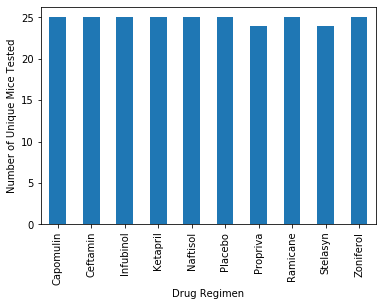

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# Create a DataFrame of unique mouse IDs and drug regimen.
# Group DataFrame by drug regimen and get a count of unique mice for each drug.


In [29]:
# Using pandas .groupby('Drug Regimen') and filter
# just the 'Mouse ID' using brackets.
# Applying pandas .nunique() the count of distint
# elements within each group will be returned

mice_count_per_treatment = Clean_All_Mouse_data_df.groupby(["Drug Regimen"])['Mouse ID'].nunique()

mice_count_per_treatment

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

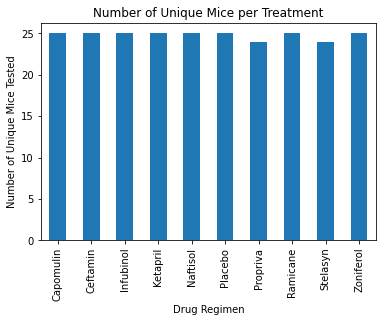

In [30]:
# apply pandas bar plot
mice_bar = mice_count_per_treatment.plot.bar()

# apply pandas x label to bar chart
plt.xlabel("Drug Regimen")
# apply pandas y label to bar chart
plt.ylabel("Number of Unique Mice Tested")
# apply pandas title to bar chart
plt.title("Number of Unique Mice per Treatment")


plt.show()

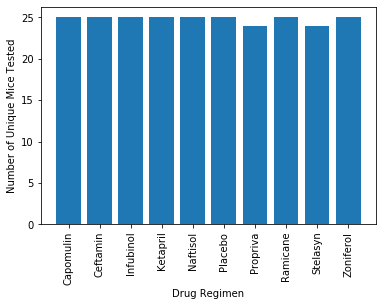

In [10]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.


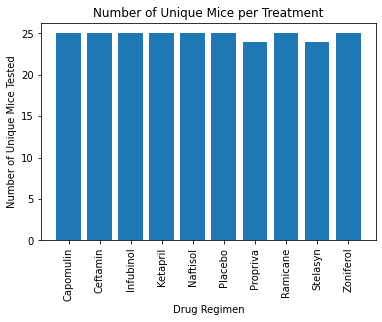

In [31]:
# Import Dependency and Setup
import numpy as np

# set spacing for x-axis 
x_axis = np.arange(len(mice_count_per_treatment))

# Create a pyplot bar chart based upon the above data
plt.bar(x_axis, mice_count_per_treatment)

# Set values for bar chart based upon the above data
tick_values = [value for value in x_axis]

# Set the current tick locations and labels of the x-axis
plt.xticks(tick_values, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

# apply x label to bar chart
plt.xlabel("Drug Regimen")
# apply y label to bar chart
plt.ylabel("Number of Unique Mice Tested")
# apply title to bar chart
plt.title("Number of Unique Mice per Treatment")

plt.show()

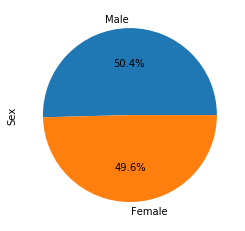

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [32]:
# Using pandas .isin() == False and applying the boolean result
# 'duplicate_lab_mice', the output will return True where
# Each row is False in 'duplicate_lab_mice' 

Mouse_metadata['Mouse ID'].isin(duplicate_lab_mice)==False

0      True
1      True
2      True
3      True
4      True
       ... 
244    True
245    True
246    True
247    True
248    True
Name: Mouse ID, Length: 249, dtype: bool

In [33]:
Clean_Mouse_metadata_c = Mouse_metadata['Mouse ID'].isin(duplicate_lab_mice)==False
Clean_Mouse_metadata_c

0      True
1      True
2      True
3      True
4      True
       ... 
244    True
245    True
246    True
247    True
248    True
Name: Mouse ID, Length: 249, dtype: bool

In [34]:
# Using .loc() we can pass the boolean 'All_Mouse_data_c' to
# obtain the list of the rows from the dataset that equal True

Clean_Mouse_metadata_df = Mouse_metadata.loc[Clean_Mouse_metadata_c]
Clean_Mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [35]:
# Using pandas filter just the 'Sex' using brackets.
# Applying pandas .value_counts() the count of distint
# elements within each Sex will be returned

mice_sex_count_per_treatment = Clean_Mouse_metadata_df['Sex'].value_counts()

mice_sex_count_per_treatment

Male      125
Female    123
Name: Sex, dtype: int64

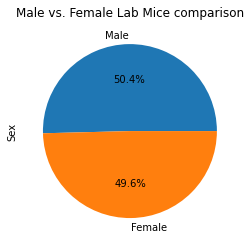

In [36]:
# apply pandas pie plot
mice_sex_count_per_treatment.plot.pie(autopct= "%1.1f%%")

# apply title to bar chart
plt.title("Male vs. Female Lab Mice comparison")
plt.show()

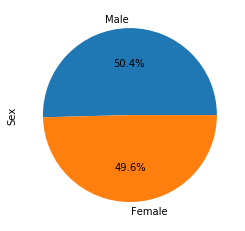

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


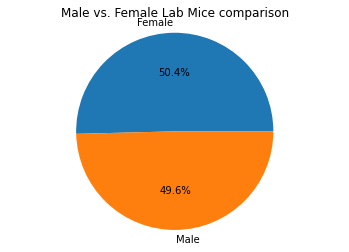

In [37]:
# Set the labels for pie chart
labels = ['Female', 'Male']

# Apply pylplot pie chart and set the values to the
# array 'mice_sex_count_per_treatment' and apply 
# the predefined lables from above
plt.pie(mice_sex_count_per_treatment, labels=labels,  autopct="%1.1f%%")

# apply title to bar chart
plt.title('Male vs. Female Lab Mice comparison')

# Create axes which are equal so we have a perfect circle
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [38]:
# final tumor volume of each mouse using Capomulin

# filter the clean dataset to only Capomulin Drug Regimen
Capomulin_df = Clean_All_Mouse_data_df.loc[Clean_All_Mouse_data_df["Drug Regimen"] == "Capomulin", :]

# Using .groupby('Mouse ID'), all data is grouped by unique
# Mouse ID.  Applying .max()['Timepoint'] to the grouped
# data, will output the largest Timepoint for each mouse using Capomulin
Capomulin_last_timepoint = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_last_timepoint

# convert series to a pandas dataframe
Capomulin_last_timepoint_df = pd.DataFrame(Capomulin_last_timepoint)
Capomulin_last_timepoint_df

# using pd.merge() the maximum Timepoint data is comibined based 
# where 'Mouse ID' and 'Timepoint' in Capomulin_last_timepoint
# are the same as rows in Clean_All_Mouse_data_df
# whose columns 'Mouse ID' and 'Timepoint' match
Capomulin_merge = pd.merge(Capomulin_last_timepoint_df, Clean_All_Mouse_data_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


In [39]:
# final tumor volume of each mouse using Ramicane

# filter the clean dataset to only Ramicane Drug Regimen
Ramicane_df = Clean_All_Mouse_data_df.loc[Clean_All_Mouse_data_df["Drug Regimen"] == "Ramicane", :]

# Using .groupby('Mouse ID'), all data is grouped by unique
# Mouse ID.  Applying .max()['Timepoint'] to the grouped
# data, will output the largest Timepoint for each mouse using Ramicane
Ramicane_last_timepoint = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last_timepoint

# convert series to a pandas dataframe
Ramicane_last_timepoint_df = pd.DataFrame(Ramicane_last_timepoint)
Ramicane_last_timepoint_df

# using pd.merge() the maximum Timepoint data is comibined based 
# where 'Mouse ID' and 'Timepoint' in Ramicane_last_timepoint
# are the same as rows in Clean_All_Mouse_data_df
# whose columns 'Mouse ID' and 'Timepoint' match
Ramicane_merge = pd.merge(Ramicane_last_timepoint_df, Clean_All_Mouse_data_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
5,c758,45,33.397653,1,Ramicane,Male,9,17
6,d251,45,37.311236,2,Ramicane,Female,8,19
7,e662,45,40.659006,2,Ramicane,Male,8,24
8,g791,45,29.128472,1,Ramicane,Male,11,16
9,i177,45,33.562402,3,Ramicane,Male,10,18


In [40]:
# final tumor volume of each mouse using Infubinol

# filter the clean dataset to only Infubinol Drug Regimen
Infubinol_df = Clean_All_Mouse_data_df.loc[Clean_All_Mouse_data_df["Drug Regimen"] == "Infubinol", :]

# Using .groupby('Mouse ID'), all data is grouped by unique
# Mouse ID.  Applying .max()['Timepoint'] to the grouped
# data, will output the largest Timepoint for each mouse using Infubinol
Infubinol_last_timepoint = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last_timepoint

# convert series to a pandas dataframe
Infubinol_last_timepoint_df = pd.DataFrame(Infubinol_last_timepoint)
Infubinol_last_timepoint_df

# using pd.merge() the maximum Timepoint data is comibined based 
# where 'Mouse ID' and 'Timepoint' in Infubinol_last_timepoint
# are the same as rows in Clean_All_Mouse_data_df
# whose columns 'Mouse ID' and 'Timepoint' match
Infubinol_merge = pd.merge(Infubinol_last_timepoint_df, Clean_All_Mouse_data_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28
5,c326,5,36.321346,0,Infubinol,Female,18,25
6,c895,30,60.969711,2,Infubinol,Female,7,29
7,e476,45,62.435404,1,Infubinol,Male,23,26
8,f345,45,60.918767,1,Infubinol,Male,23,26
9,i386,40,67.289621,4,Infubinol,Female,23,29


In [41]:
# final tumor volume of each mouse using Ceftamin

# filter the clean dataset to only Ceftamin Drug Regimen
Ceftamin_df = Clean_All_Mouse_data_df.loc[Clean_All_Mouse_data_df["Drug Regimen"] == "Ceftamin", :]

# Using .groupby('Mouse ID'), all data is grouped by unique
# Mouse ID.  Applying .max()['Timepoint'] to the grouped
# data, will output the largest Timepoint for each mouse using Ceftamin
Ceftamin_last_timepoint = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last_timepoint

# convert series to a pandas dataframe
Ceftamin_last_timepoint_df = pd.DataFrame(Ceftamin_last_timepoint)
Ceftamin_last_timepoint_df

# using pd.merge() the maximum Timepoint data is comibined based 
# where 'Mouse ID' and 'Timepoint' in Ceftamin_last_timepoint
# are the same as rows in Clean_All_Mouse_data_df
# whose columns 'Mouse ID' and 'Timepoint' match
Ceftamin_merge = pd.merge(Ceftamin_last_timepoint_df, Clean_All_Mouse_data_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25
5,h531,5,47.784682,0,Ceftamin,Male,5,27
6,j296,45,61.849023,3,Ceftamin,Female,24,30
7,k210,45,68.923185,3,Ceftamin,Male,15,28
8,l471,45,67.748662,1,Ceftamin,Female,7,28
9,l490,30,57.918381,3,Ceftamin,Male,24,26


In [42]:
# Using .groupby('Mouse ID'), all data is grouped by unique
# Mouse ID.  Applying .max()['Timepoint'] to the grouped
# data, will output the largest Timepoint for each mouse
# in the dataset
mice_treatment_Max_Timepoint = Clean_All_Mouse_data_df.groupby(["Mouse ID"]).max()['Timepoint']

# convert series to a pandas dataframe
mice_treatment_Max_Timepoint = pd.DataFrame(mice_treatment_Max_Timepoint)
mice_treatment_Max_Timepoint

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [43]:
# using pd.merge() the maximum Timepoint data is comibined based 
# where 'Mouse ID' and 'Timepoint' in mice_treatment_Max_Timepoint
# are the same as rows in Clean_All_Mouse_data_df
# whose columns 'Mouse ID' and 'Timepoint' match

Timepoint_merge = pd.merge(mice_treatment_Max_Timepoint, Clean_All_Mouse_data_df, on=("Mouse ID","Timepoint"),how="left")
Timepoint_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset
    
    # Determine outliers using upper and lower bounds

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [44]:
# If the data is in a dataframe, we use pandas to give quartile calculations
Capomulin_tumors = Capomulin_merge['Tumor Volume (mm3)']

# set quartiles for dataset
quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# calculate upper and lower outlier limits
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print upper and lower outlier limits
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# determine if outliers are present in Capomulin
Capomulin_outliers = Capomulin_tumors.loc[(Capomulin_tumors < lower_bound)| (Capomulin_tumors > upper_bound)]
Capomulin_outliers

# print any outliers within Capomulin
print(f"Ceftamin's potential outliers:", Capomulin_outliers)

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [45]:
# If the data is in a dataframe, we use pandas to give quartile calculations
Ramicane_tumors = Ramicane_merge['Tumor Volume (mm3)']

# set quartiles for dataset
quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# calculate upper and lower outlier limits
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print upper and lower outlier limits
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# determine if outliers are present in Ramicane
Ramicane_outliers = Ramicane_tumors.loc[(Ramicane_tumors < lower_bound)| (Ramicane_tumors > upper_bound)]
Ramicane_outliers

# print any outliers within Ramicane
print(f"Ceftamin's potential outliers:", Ramicane_outliers)

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [46]:
# If the data is in a dataframe, we use pandas to give quartile calculations
Infubinol_tumors = Infubinol_merge['Tumor Volume (mm3)']

# set quartiles for dataset
quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# calculate upper and lower outlier limits
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print upper and lower outlier limits
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# determine if outliers are present in Infubinol
Infubinol_outliers = Infubinol_tumors.loc[(Infubinol_tumors < lower_bound)| (Infubinol_tumors > upper_bound)]
Infubinol_outliers

# print any outliers within Inbufinol
print(f"Ceftamin's potential outliers:", Infubinol_outliers)

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceftamin's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [47]:
# If the data is in a dataframe, we use pandas to give quartile calculations
Ceftamin_tumors = Ceftamin_merge['Tumor Volume (mm3)']

# set quartiles for dataset
quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# calculate upper and lower outlier limits
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# print upper and lower outlier limits
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# determine if outliers are present in Ceftamin
Ceftamin_outliers = Ceftamin_tumors.loc[(Ceftamin_tumors < lower_bound)|(Ceftamin_tumors > upper_bound)]
Ceftamin_outliers

# print any outliers within Ceftamin
print(f"Ceftamin's potential outliers:", Ceftamin_outliers)

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [48]:
# print outliers from all four selecteted
# drug regimens

print(f"Capomulin's potential outliers:", Capomulin_outliers)
print(f"Ramicane's potential outliers:", Ramicane_outliers)
print(f"Infubinol's potential outliers:", Infubinol_outliers)
print(f"Ceftamin's potential outliers:", Ceftamin_outliers)

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


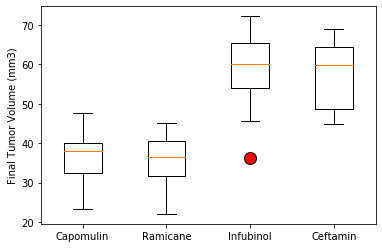

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [49]:
# Create emtpy list for Capomulin Tumor Volumes
Capomulin_Tumor_vol = []

# iterate through each row in 'Capomulin_merge' and
# append 'Tumor Volume (mm3)' to
# the list 'Capomulin_Tumor_vol'
for i in Capomulin_merge['Tumor Volume (mm3)']:
    Capomulin_Tumor_vol.append(i)

# convert 'Capomulin_Tumor_vol' to a dataframe
Capomulin_Tumor_vol
Capomulin_Tumor_vol_df = pd.DataFrame(Capomulin_Tumor_vol,columns=['Capomulin Tumor Volume (mm3)'])

# print converted dataframe
print (Capomulin_Tumor_vol_df)

    Capomulin Tumor Volume (mm3)
0                      38.982878
1                      38.939633
2                      30.485985
3                      37.074024
4                      40.159220
5                      47.685963
6                      37.311846
7                      38.125164
8                      38.753265
9                      41.483008
10                     38.846876
11                     28.430964
12                     33.329098
13                     46.539206
14                     32.377357
15                     41.581521
16                     23.343598
17                     40.728578
18                     34.455298
19                     31.023923
20                     40.658124
21                     39.952347
22                     36.041047
23                     28.484033
24                     31.896238


In [50]:
# Create emtpy list for Ramicane Tumor Volumes
Ramicane_Tumor_vol = []

# iterate through each row in 'Capomulin_merge' and
# append 'Tumor Volume (mm3)' to
# the list 'Ramicane_Tumor_vol'
for i in Ramicane_merge['Tumor Volume (mm3)']:
    Ramicane_Tumor_vol.append(i)

# convert 'Ramicane_Tumor_vol' to a dataframe
Ramicane_Tumor_vol
Ramicane_Tumor_vol_df = pd.DataFrame(Ramicane_Tumor_vol,columns=['Ramicane Tumor Volume (mm3)'])

# print converted dataframe
print(Ramicane_Tumor_vol_df)

    Ramicane Tumor Volume (mm3)
0                     38.407618
1                     43.047543
2                     38.810366
3                     32.978522
4                     38.342008
5                     33.397653
6                     37.311236
7                     40.659006
8                     29.128472
9                     33.562402
10                    36.374510
11                    31.560470
12                    36.134852
13                    22.050126
14                    30.564625
15                    31.095335
16                    45.220869
17                    36.561652
18                    37.225650
19                    43.419381
20                    30.276232
21                    40.667713
22                    43.166373
23                    44.183451
24                    30.638696


In [51]:
# Create emtpy list for Infubinol Tumor Volumes
Infubinol_Tumor_vol = []

# iterate through each row in 'Capomulin_merge' and
# append 'Tumor Volume (mm3)' to
# the list 'Infubinol_Tumor_vol'
for i in Infubinol_merge['Tumor Volume (mm3)']:
    Infubinol_Tumor_vol.append(i)

# convert 'Infubinol_Tumor_vol' to a dataframe    
Infubinol_Tumor_vol
Infubinol_Tumor_vol_df = pd.DataFrame(Infubinol_Tumor_vol,columns=['Infubinol Tumor Volume (mm3)'])

# print converted dataframe
print(Infubinol_Tumor_vol_df)

    Infubinol Tumor Volume (mm3)
0                      67.973419
1                      65.525743
2                      57.031862
3                      66.083066
4                      72.226731
5                      36.321346
6                      60.969711
7                      62.435404
8                      60.918767
9                      67.289621
10                     66.196912
11                     62.117279
12                     47.010364
13                     60.165180
14                     55.629428
15                     45.699331
16                     54.656549
17                     55.650681
18                     46.250112
19                     54.048608
20                     51.542431
21                     50.005138
22                     58.268442
23                     67.685569
24                     62.754451


In [52]:
# Create emtpy list for Ceftamin Tumor Volumes
Ceftamin_Tumor_vol = []

# iterate through each row in 'Capomulin_merge' and
# append 'Tumor Volume (mm3)' to
# the list 'Ceftamin_Tumor_vol'
for i in Ceftamin_merge['Tumor Volume (mm3)']:
    Ceftamin_Tumor_vol.append(i)

# convert 'Ceftamin_Tumor_vol' to a dataframe
Ceftamin_Tumor_vol
Ceftamin_Tumor_vol_df = pd.DataFrame(Ceftamin_Tumor_vol,columns=['Ceftamin Tumor Volume (mm3)'])

# print converted dataframe
print(Ceftamin_Tumor_vol_df)

    Ceftamin Tumor Volume (mm3)
0                     62.999356
1                     45.000000
2                     56.057749
3                     55.742829
4                     48.722078
5                     47.784682
6                     61.849023
7                     68.923185
8                     67.748662
9                     57.918381
10                    46.784535
11                    59.851956
12                    64.299830
13                    59.741901
14                    61.433892
15                    64.192341
16                    45.000000
17                    52.925348
18                    45.000000
19                    67.527482
20                    45.000000
21                    64.634949
22                    61.386660
23                    68.594745
24                    64.729837


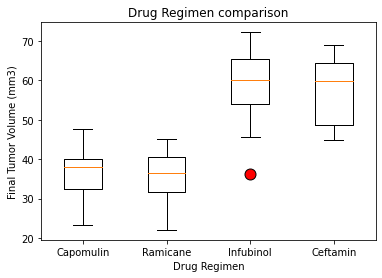

In [53]:
data_to_plot = [Capomulin_Tumor_vol, Ramicane_Tumor_vol, Infubinol_Tumor_vol, Ceftamin_Tumor_vol]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# format outlier marker
red_circle = dict(markerfacecolor='red', marker='o', markersize='11')

# data_to_plot = data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen comparison')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, flierprops=red_circle, labels=Regimen)
plt.show()

In [ ]:
# Insight #1 - Capomulin and Ramicane treated Tumors whose volume did not exceed 50 (mm3)

In [ ]:
# Insight #2 - Infubinol and Ceftamin treated Tumors whose initial volume was 45 (mm3) or greater.

## Line and Scatter Plots

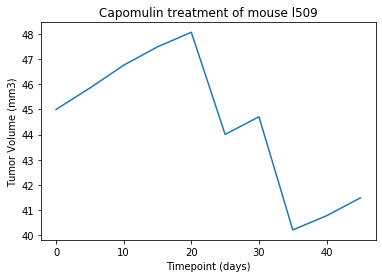

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

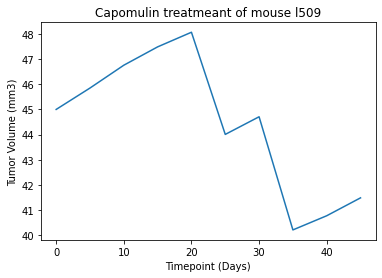

In [54]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# filter the clean dataset to only Mouse ID l509
Mouse_l509_df = Clean_All_Mouse_data_df.loc[Clean_All_Mouse_data_df["Mouse ID"] == "l509", :]

# set x axis to the values in the
# 'Timepoint' column in the 'Mouse_l509' dataset
x_axis = Mouse_l509_df["Timepoint"]

# set x axis to the values in the
# 'Tumor Volume (mm3)' column in the 'Mouse_l509' dataset
y_axis = Mouse_l509_df["Tumor Volume (mm3)"]

# apply pyline chart
plt.plot(x_axis, y_axis)

# apply title to chart
plt.title('Capomulin treatmeant of mouse l509')

# apply x-axis label
plt.xlabel('Timepoint (Days)')

# apply y-axis label
plt.ylabel('Tumor Volume (mm3)')


# show pyline chart
plt.show()

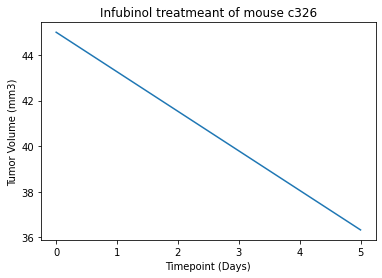

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# filter the clean dataset to only Mouse ID l509
Mouse_c326_df = Clean_All_Mouse_data_df.loc[Clean_All_Mouse_data_df["Mouse ID"] == "c326", :]

# set x axis to the values in the
# 'Timepoint' column in the 'Mouse_l509' dataset
x_axis = Mouse_c326_df["Timepoint"]

# set x axis to the values in the
# 'Tumor Volume (mm3)' column in the 'Mouse_l509' dataset
y_axis = Mouse_c326_df["Tumor Volume (mm3)"]

# apply pyline chart
plt.plot(x_axis, y_axis)

# apply title to chart
plt.title('Infubinol treatmeant of mouse c326')

# apply x-axis label
plt.xlabel('Timepoint (Days)')

# apply y-axis label
plt.ylabel('Tumor Volume (mm3)')


# show pyline chart
plt.show()

In [ ]:
# Inisght #3 - The Infunabonl caused a decline in tumor size for this mouse (c326).

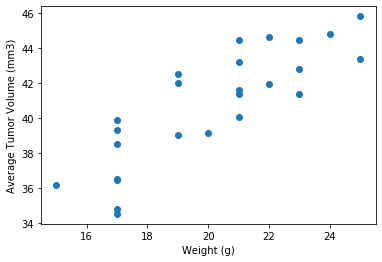

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

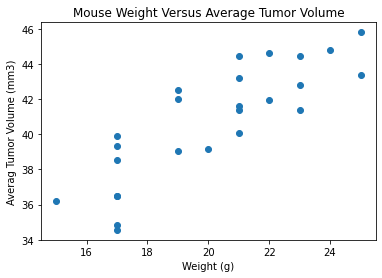

In [56]:
# apply groupby(['Mouse ID']) to Capomulin dataframe
# and .mean() outputs the average
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

# apply scatter plot
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])

# apply title to chart
plt.title('Mouse Weight Versus Average Tumor Volume')

# apply x-label to chart
plt.xlabel('Weight (g)')

# apply y-label to chart
plt.ylabel('Averag Tumor Volume (mm3)')

# print scatter plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


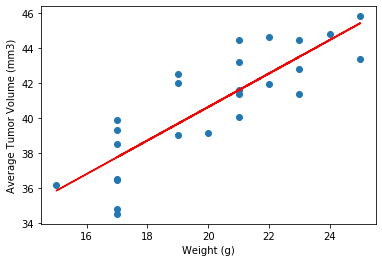

In [18]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

In [57]:
# Import Dependency and Setup
import scipy.stats as st
from scipy.stats import linregress


weight = avg_capm_vol['Weight (g)']
TVol = avg_capm_vol['Tumor Volume (mm3)']

The correlation between mouse weight and the average tumor volume is 0.84


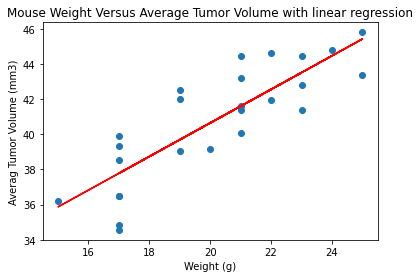

In [58]:
# apply groupby(['Mouse ID']) to Capomulin dataframe
# and .mean() outputs the average
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

# Set values of the column 'Weight (g)' to the x-axis
x_values = avg_capm_vol['Weight (g)']

# Set values of the column 'Tumor Volume (mm3)' to the x-axis
y_values = avg_capm_vol['Tumor Volume (mm3)']

# Set values for linear regression variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Setup linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Apply line plot
plt.plot(x_values,regress_values,"r-")

# Apply scatter plot
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])

# apply title to chart
plt.title('Mouse Weight Versus Average Tumor Volume with linear regression')

# apply x-label to chart
plt.xlabel('Weight (g)')

# apply y-label to chart
plt.ylabel('Averag Tumor Volume (mm3)')

#apply pearsonr function to calculate correlation
correlation = st.pearsonr(TVol,weight)

# Print statement expressing the correlation calculation
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")